## 1. Import necessasary libraries

In [4]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [5]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
newspaper_data.shape

(34, 3)

In [5]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### 3.2 Assumptions Check

#### 1. Linearity Test

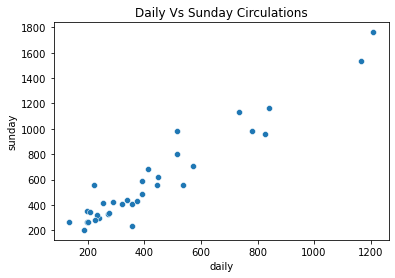

In [10]:
sns.scatterplot(x = 'daily', y = 'sunday', data = newspaper_data)
plt.title('Daily Vs Sunday Circulations')
plt.show()

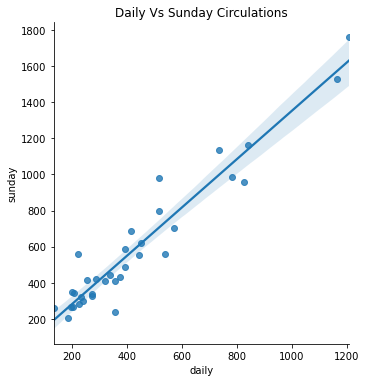

In [11]:
sns.lmplot(x = 'daily', y = 'sunday', data = newspaper_data)
plt.title('Daily Vs Sunday Circulations')
plt.show()

### 2. Normality Test

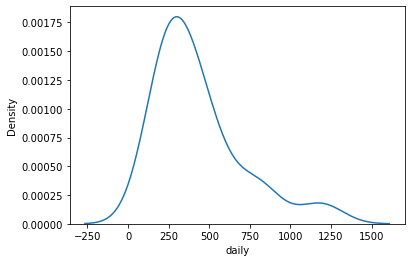

In [15]:
sns.distplot(a = newspaper_data['daily'],hist=False)
plt.show()

In [16]:
newspaper_data['daily'].skew()

1.5321591323040094

### 3. MultiCollinearity Check

#### It can be perfomed using, 
1. Correlation Matrix
2. Variance Inflation Factor(VIF)

### 4. No Autoregression

There is no time based input in my input features.

### 5. Homoscadascity Check | 6. Zero Residual Mean Check

#### Note: These 2 tests can be performed post model training

## 4. Data Preparation

In [6]:
del newspaper_data['Newspaper']

In [18]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

In [19]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

### =======================================================================================

### NOTE:

#### Linear Regression can be build using 2 libraries:

##### 1. Using statsmodels library
##### 2. Using sklearn library

### =======================================================================================

### 1. Using statsmodels

If statsmodels, Model building and Model Training will happen at the same time using **OLS Techique(Ordinary Least Square).** 

### 5. Model Building | 6. Model Training

In [7]:
import statsmodels.formula.api as smf

In [8]:
linear_model = smf.ols(formula = 'sunday~daily', data = newspaper_data).fit() #Model Building and Model Training

In [24]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

### 7. Model Testing

#### Manual Calculation

In [25]:
#y = mx + c
#If x = 200, y = ?
(1.339715*200) + 13.835630

281.77862999999996

In [26]:
#If 300, y =?
(1.339715*300) + 13.835630

415.75012999999996

#### Machine Prediction

In [9]:
test_data = pd.read_csv('linear_demo.csv')
test_data

,daily
0,200
1,300
2,400


In [10]:
linear_model.predict(test_data)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

### 8. Model Evaluation

### <<<<<< PARK >>>>>>>>>>>

### 9. Model Deployement

In [11]:
from pickle import dump

In [12]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialozation, pickling, convert to binary file

In [13]:
from pickle import load

In [16]:
loaded_lin_file = load(open('linear_model.pkl','rb'))

In [17]:
loaded_lin_file.predict(test_data)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

### END OF THE LC.